<a href="https://colab.research.google.com/github/vicperotti/BANA780/blob/main/Twitter_Sentiment_Analysis_with_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example Code to Analyze Twitter Data using afinn package to do sentiment analysis and nltk for text mining

Information about the afinn dataset: https://finnaarupnielsen.wordpress.com/2011/03/16/afinn-a-new-word-list-for-sentiment-analysis/

Information about the afinn package:http://rkuykendall.com/articles/simple-sentiment-analysis-in-python-using-afinn/

In the first step we import needed packages, read a json file, and then CAREFULLY choose which lines to analyze. The try structure allows the code to continue even if there is an error. The if statements skip lines in the file that don't have the information we need.

!pip install afinn #maybe have to do this if not already installed!

In [70]:
!pip install afinn

In [71]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from afinn import Afinn

tweets_data_path = 'virtualcurrency.json' #set this to your filename
tweets_data = []
tweets_file = open(tweets_data_path, "r")

for line in tweets_file:
    try:
        if 'created_at' in line:
             tweet = json.loads(line)
             #if 'retweeted_status' in tweet:
             tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

3672


In [100]:
tweets_data[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Apr 09 16:24:58 +0000 2018',
 'display_text_range': [0, 35],
 'entities': {'hashtags': [{'indices': [0, 10], 'text': 'Bethereum'},
   {'indices': [11, 20], 'text': 'ethereum'},
   {'indices': [21, 26], 'text': 'BTHR'},
   {'indices': [27, 35], 'text': 'bitcoin'}],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/bethereumteam/…',
    'expanded_url': 'https://twitter.com/bethereumteam/status/980769623091138560',
    'indices': [36, 59],
    'url': 'https://t.co/hMXHEAIhoi'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 983380258446426112,
 'id_str': '983380258446426112',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': True,
 'lang': 'und',
 'place': None,
 'possibly_sensitive': False,
 'quote_count': 0,
 'quoted_

We will use the Pandas DataFrame to hold the information. In this case, we construct the dataframe manually from the information in the list called tweets_data. The afinn line shows how easy it is to get a score for a piece of text.

In [72]:
tweets = pd.DataFrame()
#ADD columns to dataframe
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] is not None else None, tweets_data))
tweets['isretweet'] = list(map(lambda tweet: True if 'retweeted_status' in tweet else False, tweets_data))

#embedded if statement address if the retweeted_status piece is not present
tweets['favorite_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['favorite_count']) if 'retweeted_status' in tweet else int(tweet['favorite_count']), tweets_data))
tweets['retweet_count'] = list(map(lambda tweet: int(tweet['retweeted_status']['retweet_count']) if 'retweeted_status' in tweet else int(tweet['retweet_count']), tweets_data))
	
afinn = Afinn(emoticons=True)
tweets['sentiment'] = list(map(lambda tweet: afinn.score(tweet['text']), tweets_data ))

tweets['created'] = list(map(lambda tweet: tweet['created_at'], tweets_data))

In [73]:
tweets

,text,lang,country,isretweet,favorite_count,retweet_count,sentiment,created
0,#Bethereum #ethereum #BTHR #bitcoin https://t....,und,None,False,0,0,0.0,Mon Apr 09 16:24:58 +0000 2018
1,RT @StopTheFakes_io: Doctor of Economics and a...,en,None,True,318,291,1.0,Mon Apr 09 16:24:58 +0000 2018
2,RT @murthaburke: Selling over 2 million canvas...,en,None,True,618,992,2.0,Mon Apr 09 16:24:59 +0000 2018
3,@AnnCoulter FB will get a pass. Lk at which 3...,en,None,False,0,0,0.0,Mon Apr 09 16:24:59 +0000 2018
4,SWAPCHANGE (500 SC) AIRDROP Token (250 SC TOKE...,nl,None,False,0,0,0.0,Mon Apr 09 16:24:59 +0000 2018
...,...,...,...,...,...,...,...,...
3667,Copy successful traders automatically with Bit...,en,None,False,0,0,3.0,Mon Apr 09 16:40:09 +0000 2018
3668,"Explosión de Bitcoin, Dukascopy Swiss Forex Ba...",es,None,False,0,0,3.0,Mon Apr 09 16:40:10 +0000 2018
3669,RT @Peurtoken: https://t.co/o5pyFZPow7 marketp...,en,None,True,8,11,-1.0,Mon Apr 09 16:40:10 +0000 2018
3670,Does anyone know if bitcoin mining with an ASI...,en,None,False,0,0,2.0,Mon Apr 09 16:40:10 +0000 2018


In [74]:
len(tweets['text'])

3672

In [75]:
len(tweets[tweets.retweet_count > 500])

977

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb346036250>]],
      dtype=object)

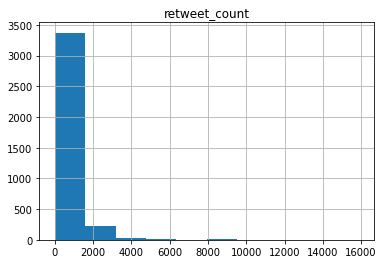

In [76]:
#We can use the hist function for a DataFrame to draw a chart!
tweets.hist(column='retweet_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb346618ed0>]],
      dtype=object)

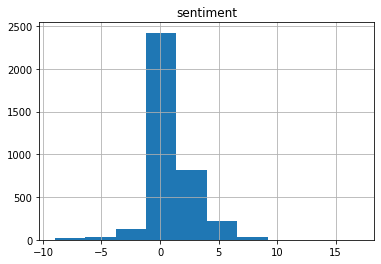

In [77]:
tweets.hist(column='sentiment')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3460b7190>]],
      dtype=object)

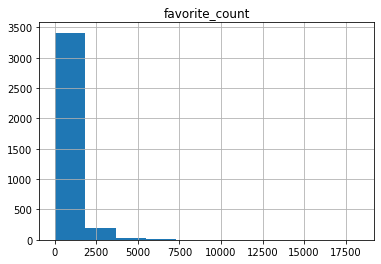

In [78]:
tweets.hist(column='favorite_count')

In [79]:
#we can use the nlargest or nsmallest from pandas to explore results
print(tweets[tweets.isretweet == False].nlargest(5,'retweet_count'))

                                                text  ...                         created
0  #Bethereum #ethereum #BTHR #bitcoin https://t....  ...  Mon Apr 09 16:24:58 +0000 2018
3  @AnnCoulter FB will get a pass.  Lk at which 3...  ...  Mon Apr 09 16:24:59 +0000 2018
4  SWAPCHANGE (500 SC) AIRDROP Token (250 SC TOKE...  ...  Mon Apr 09 16:24:59 +0000 2018
5  Haejin Lee $BTC analysis:\nBitcoin (BTC) Morni...  ...  Mon Apr 09 16:24:59 +0000 2018
6     #Bitcoin #비트코인 #맞팔 #모델 https://t.co/bATn9kApNQ  ...  Mon Apr 09 16:24:59 +0000 2018

[5 rows x 8 columns]


In [80]:
print(tweets.nsmallest(10,'sentiment'))

                                                   text  ...                         created
77    RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:25:19 +0000 2018
183   RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:25:50 +0000 2018
530   RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:27:26 +0000 2018
800   RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:28:37 +0000 2018
1215  RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:30:15 +0000 2018
1253  RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:30:25 +0000 2018
1301  RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:30:34 +0000 2018
1331  RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:30:41 +0000 2018
1600  RT @ArminVanBitcoin: Don't panic sell.\nDon't ...  ...  Mon Apr 09 16:31:36 +0000 2018
2154  RT @CalvinAyre: Vitalik is a fraudster....guys...  ...  Mon Apr 

In [101]:
tweets.nsmallest(10,'sentiment')

,text,lang,country,isretweet,favorite_count,retweet_count,sentiment,created
77,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,493,110,-9.0,Mon Apr 09 16:25:19 +0000 2018
183,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,494,110,-9.0,Mon Apr 09 16:25:50 +0000 2018
530,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,503,111,-9.0,Mon Apr 09 16:27:26 +0000 2018
800,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,507,112,-9.0,Mon Apr 09 16:28:37 +0000 2018
1215,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,512,113,-9.0,Mon Apr 09 16:30:15 +0000 2018
1253,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,514,114,-9.0,Mon Apr 09 16:30:25 +0000 2018
1301,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,515,115,-9.0,Mon Apr 09 16:30:34 +0000 2018
1331,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,515,116,-9.0,Mon Apr 09 16:30:41 +0000 2018
1600,RT @ArminVanBitcoin: Don't panic sell.\nDon't ...,en,None,True,520,117,-9.0,Mon Apr 09 16:31:36 +0000 2018
2154,RT @CalvinAyre: Vitalik is a fraudster....guys...,en,None,True,98,40,-9.0,Mon Apr 09 16:33:41 +0000 2018


In [81]:
!pip install textblob

In [82]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
tweetstr = " ".join(tweets['text'])
tweetblob = TextBlob(tweetstr)
tokens = nltk.word_tokenize(tweetstr) 
#Sometimes you will need additional stuff from the nltk package. You can get this by....

In [84]:
#overall seniment for all tweets 
tweetblob.sentiment 

Sentiment(polarity=0.22743150390394523, subjectivity=0.4961629623381501)

In [85]:
tweetblob.words.count('ethereum')

506

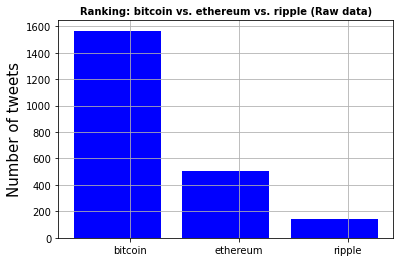

In [86]:
prg_langs = ['bitcoin', 'ethereum', 'ripple']
tweets_by_prg_lang = [tweetblob.words.count('bitcoin'), tweetblob.words.count('ethereum'), tweetblob.words.count('ripple')]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='b')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: bitcoin vs. ethereum vs. ripple (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.15 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [87]:
wordfreqs = nltk.probability.FreqDist(w.lower() for w in tokens)# tweetblob.words)
mostcommon = wordfreqs.most_common(20)
mostcommon #this list includes a bunchof common words, so we should eliminate them...

[('#', 6771),
 (':', 5830),
 ('@', 3451),
 ('https', 2761),
 ('rt', 2222),
 (',', 1647),
 ('bitcoin', 1564),
 ('the', 1359),
 ('.', 1338),
 ('!', 915),
 ('to', 862),
 ('is', 811),
 ('of', 741),
 ('a', 712),
 ('and', 652),
 ('in', 583),
 ('for', 579),
 ('$', 540),
 ('blockchain', 523),
 ('ethereum', 506)]

# Data Cleaning


In [88]:
from bs4 import BeautifulSoup
import re

In [89]:
###We need to do some data cleaning!
###Ricky to the rescue...
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

#testing = tweets.text[:100]
#test_result = []
#for t in testing:
#    test_result.append(tweet_cleaner(t))
#test_result

In [90]:
clean_texts =[]
for t in tweets.text:
    clean_texts.append(tweet_cleaner(t))

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/szSSUl8c6o" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/DmeYovw9Ul" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/FeOi95xJs6" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful S

In [91]:
clean_texts

['bethereum ethereum bthr bitcoin',
 'rt io doctor of economics and a full member of russian academy of sciences aleksandr dmitrievich nekipelov has agreed to con',
 'rt selling over million canvas prints annually is an energetic fast paced company producing custo',
 'fb will get a pass lk at which letter agencies invested in them and how fb has become a proxy for g',
 'swapchange sc airdrop token sc tokens per referral airdrop bounty btc xrp freetoken crypto eth',
 'haejin lee btc analysis bitcoin btc morning update the final dip via',
 'bitcoin',
 'min rsi signals btc vtr btc omni btc gbg btc neos btc tks',
 'rt isupportcryptocurrency if one side rbi is banning bitcoin dealing in inr and one side rbi is introducing i',
 'rt one google is no longer accepting extensions that mine cryptocurrency of any sort cryptocurrency crypto currency investme',
 'rt kachingcoins announces the proud gold sponsorship at tokenomx a top blockchain conference in thailand place chaiang m',
 'use our websi

In [102]:
tweetstr2 = " ".join(clean_texts)
tweetblob2 = TextBlob(tweetstr2)
tokens2 = nltk.word_tokenize(tweetstr2)

In [93]:
clean_sentences = (tweet + '.' for tweet in clean_texts)
sentencestr = " ".join(clean_sentences)
sentenceblob = TextBlob(sentencestr)

In [94]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('rt')
tweetblob_words = (w.lower() for w in tweetblob2.words if w not in stopwords)
cleantextstr = " ".join(tweetblob_words)
cleanblob = TextBlob(cleantextstr)

In [95]:
wordfreqs = nltk.probability.FreqDist(w.lower() for w in cleanblob.words)
mostcommon = wordfreqs.most_common(20)
mostcommon

[('bitcoin', 1495),
 ('blockchain', 540),
 ('ethereum', 510),
 ('crypto', 489),
 ('cryptocurrency', 395),
 ('ico', 388),
 ('btc', 332),
 ('eth', 242),
 ('airdrop', 227),
 ('free', 199),
 ('token', 198),
 ('get', 163),
 ('sale', 146),
 ('tokens', 140),
 ('one', 138),
 ('ripple', 131),
 ('join', 130),
 ('never', 127),
 ('money', 125),
 ('xrp', 122)]

In [96]:
#consider the most popular two word sequences aka bigrams...

In [97]:
#ngrams = cleanblob.ngrams(n=3)

ngrams = nltk.bigrams(cleanblob.words)
ngramfreqs = nltk.probability.FreqDist(ngrams)
mostcommon = ngramfreqs.most_common(20)
mostcommon


[(('crypto', 'blockchain'), 84),
 (('ethereum', 'bitcoin'), 84),
 (('never', 'revealed'), 77),
 (('revealed', 'ecom'), 77),
 (('ecom', 'secret'), 77),
 (('secret', 'weapon'), 77),
 (('weapon', 'give'), 77),
 (('give', 'hot'), 77),
 (('hot', 'trends'), 77),
 (('trends', 'fb'), 77),
 (('fb', 'interests'), 77),
 (('interests', 'products'), 77),
 (('products', 'design'), 77),
 (('design', 'ideas'), 77),
 (('cryptocurrency', 'crypto'), 76),
 (('selling', 'million'), 75),
 (('million', 'canvas'), 75),
 (('canvas', 'prints'), 75),
 (('prints', 'annually'), 75),
 (('annually', 'energetic'), 75)]

In [98]:
#which words are similar to bitcoin?
text = nltk.Text(cleanblob.words)
text.similar('bitcoin')
text2 = nltk.Text(tokens)
text2.similar('bitcoin')

ethereum blockchain eth crypto btc cryptocurrency ico bitco ether
ripple tokensale usd satoshi bitcoinnews token tokens cryptocurrencies
b price european
https blockchain crypto ethereum cryptocurrency btc eth ico rt ripple
bethereum it ether cryptocurrencies tokensale the more buy now a


In [99]:
nltk.download('brown')
cleanblob.noun_phrases.count('ethereum')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


0